In [1]:
import pandas as pd
import numpy as np

# visualisation libraries:
import matplotlib.pyplot as plt  # 2-d graphics
import seaborn as sns  # graphics for statistics
%matplotlib inline

# timeworks
import datetime 

# encoding 
from sklearn.preprocessing import OneHotEncoder 

In [2]:
data = pd.read_csv('nko_dropped.csv')
data.head()

,Unnamed: 0,regionName,fullName,dateReg,minjustForm,ogrn,opf,egrulStatus,mainOkved,regionCode,incomeTotal,inn,originDate,dateLiquid,address,okogu,hasRegionalSupport,addOkved,dateOgrn
0,0,Санкт-Петербург,МЕЖРЕГИОНАЛЬНАЯ АНТРОПОСОФСКАЯ МЕДИЦИНСКАЯ АСС...,NaN,"Объединения (союз, ассоциация) юридических лиц",1207800141790,"{'name': 'Ассоциации (союзы)', 'code': '20600'...",Действует,{'name': 'Деятельность профессиональных членск...,78,0.0,7.841091e+09,{'$date': '2020-10-30T00:00:00.000Z'},NaN,"191186, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА ИТАЛЬЯНСК...","{'name': None, 'code': None}",False,[],{'$date': '2020-10-30T00:00:00.000Z'}
1,1,Москва,"ФОНД ""СОДЕЙСТВИЕ ДУХОВНОМУ РАЗВИТИЮ ЧЕЛОВЕКА ""...",NaN,Некоммерческий фонд,1207700349152,"{'name': 'Фонды', 'code': '70400', 'version': ...",Действует,{'name': 'Предоставление прочих финансовых усл...,77,0.0,7.720647e+09,{'$date': '2020-09-23T00:00:00.000Z'},NaN,"111395, ГОРОД МОСКВА, УЛИЦА МОЛДАГУЛОВОЙ, ДОМ ...","{'name': None, 'code': None}",False,"[{'name': 'Издание книг', 'code': '58.11', 've...",{'$date': '2020-09-23T00:00:00.000Z'}
2,2,Санкт-Петербург,"КОЛЛЕГИЯ АДВОКАТОВ ""САНКТ-ПЕТЕРБУРГСКАЯ КОЛЛЕГ...",NaN,Коллегия адвокатов,1207800011430,"{'name': 'Коллегии адвокатов', 'code': '20616'...",Действует,"{'name': 'Деятельность в области права', 'code...",78,0.0,7.813643e+09,{'$date': '2020-02-03T00:00:00.000Z'},NaN,"197198, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА БОЛЬШАЯ П...","{'name': None, 'code': None}",False,[],{'$date': '2020-02-03T00:00:00.000Z'}
3,3,Москва,"ТОВАРИЩЕСТВО СОБСТВЕННИКОВ НЕДВИЖИМОСТИ ""ЛУГИН...",NaN,NaN,1207700348976,{'name': 'Товарищества собственников недвижимо...,Действует,{'name': 'Управление недвижимым имуществом за ...,77,0.0,7.733360e+09,{'$date': '2020-09-23T00:00:00.000Z'},NaN,"125424, ГОРОД МОСКВА, ШОССЕ ВОЛОКОЛАМСКОЕ, ДОМ...","{'name': None, 'code': None}",False,[{'name': 'Аренда и управление собственным или...,{'$date': '2020-09-23T00:00:00.000Z'}
4,4,Санкт-Петербург,"АВТОНОМНАЯ НЕКОММЕРЧЕСКАЯ ОРГАНИЗАЦИЯ ""ЦЕНТР С...",NaN,Автономная некоммерческая организация,1207800081500,{'name': 'Автономные некоммерческие организаци...,Действует,{'name': 'Деятельность по организации конферен...,78,0.0,7.813645e+09,{'$date': '2020-07-08T00:00:00.000Z'},NaN,"197198, ГОРОД САНКТ-ПЕТЕРБУРГ, УЛИЦА ЗВЕРИНСКА...","{'name': None, 'code': None}",False,[{'name': 'Исследование конъюнктуры рынка и из...,{'$date': '2020-07-08T00:00:00.000Z'}


In [3]:
# Табличка признаков 
data_agg = data.agg({'nunique', lambda s: s.unique()[:10]})\
    .append(pd.Series(data.isnull().sum(), name='null'))\
    .append(pd.Series(data.dtypes, name='dtype'))\
    .transpose()
data_agg

,<lambda>,nunique,null,dtype
Unnamed: 0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",747034,0,int64
regionName,"[Санкт-Петербург, Москва, Республика Марий Эл,...",86,25,object
fullName,[МЕЖРЕГИОНАЛЬНАЯ АНТРОПОСОФСКАЯ МЕДИЦИНСКАЯ АС...,665787,0,object
dateReg,"[nan, {'$date': '1991-04-12T00:00:00.000Z'}, {...",12927,425618,object
minjustForm,"[Объединения (союз, ассоциация) юридических ли...",42,285961,object
ogrn,"[1207800141790, 1207700349152, 1207800011430, ...",747034,0,int64
opf,"[{'name': 'Ассоциации (союзы)', 'code': '20600...",291,0,object
egrulStatus,"[Действует, Ликвидирована]",2,0,object
mainOkved,[{'name': 'Деятельность профессиональных членс...,2209,0,object
regionCode,"[78, 77, 12, 75, 23, 43, 30, 4, 50, 58]",93,0,int64


In [4]:
drop_cols = []

In [5]:
drop_cols.append('Unnamed: 0')

In [6]:
data.drop(columns = drop_cols, inplace = True )

Misses detected: 1061281


<AxesSubplot:>

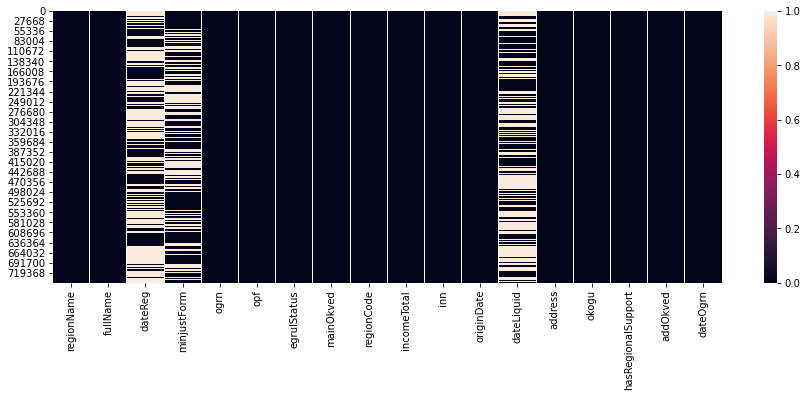

In [7]:
print('Misses detected:', data.isnull().sum().sum())

plt.subplots(figsize=(15, 5))
sns.heatmap(data.isnull())

Гипотезы: 
        
        НКО с с положительным флагом по hasRegionalSupport  будут иметь меньше шансов на грант. ДБ соцориентрованы, получают приоритетную поддержку от региона.

####  Target
назанчим флаг target  по уровню дохода из открытых источников: 1 если такие поступления есть, 0 - если нет. 

In [8]:
data['target'] = np.nan

In [9]:
data.loc[data['incomeTotal'] > 0, 'target'] = 1 

In [10]:
data.target.fillna(0, inplace = True)

In [11]:
data.target.value_counts()


0.0    712729
1.0     34305
Name: target, dtype: int64

##  OPF 

In [12]:
data.minjustForm.isnull().sum()

285961

In [13]:
df = pd.DataFrame()
df['granted']= data[data.target == 0].groupby('minjustForm')['ogrn'].count()
df['nongranted'] = data[data.target == 1].groupby('minjustForm')['ogrn'].count()
df['total_count'] = data.groupby('minjustForm')['ogrn'].count()
df

,granted,nongranted,total_count
minjustForm,,,
Автономная некоммерческая организация,44606,6891.0,51497
Адвокатские палаты субъектов РФ,89,3.0,92
Адвокатское бюро,1013,84.0,1097
Ассоциация,1,NaN,1
Ассоциация крестьянских (фермерских) хозяйств,660,7.0,667
Ассоциация экономического развития,197,7.0,204
Государственная корпорация,1,7.0,8
Государственно-общественное объединение,122,8.0,130
Иные некоммерческие организации,817,31.0,848


Сведения о правовой форме НКО в системе классификации минюста показывает, что нет такой формы, которая никогда бы не получала финансирования. 

In [14]:
data.dateOgrn.isnull().sum()
# огрн уникален и поэтому попробую восстановить опф формы для пропусков используя доп данные 

0

## Geo 

####  Region code 

In [15]:
data.regionCode.value_counts()

77    80178
50    37927
78    31767
23    23337
66    23030
      ...  
99       91
81       84
88       65
82       31
0        25
Name: regionCode, Length: 93, dtype: int64

In [16]:
data[data.regionCode == 0]['address']

31530     420015, РЕСПУБЛИКА Татарстан, УЛИЦА К.МАРКСА, ...
46886     420100, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ПРОСПЕКТ П...
51173     420140, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА КАРАТАУ, Д...
53316     420101, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА МАВЛЮТОВА,...
53323     РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА Н.ЕРШОВА, ДОМ 28, ...
53841     420021, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА КАМАЛА ГАЛ...
54766     420044, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ЯМАШЕВА, Д...
61942     420133, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ЛАВРЕНТЬЕВ...
62898     420015, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА К.МАРКСА, ...
68375           РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ПРОСПЕКТ ПОБЕДЫ
69775     420045, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА Н.ЕРШОВА, ...
69901     420021, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА К.ТИНЧУРИН...
192669    420111, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА М.ДЖАЛИЛЯ,...
196977       РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА К.ТИНЧУРИНА, ДОМ 3
499182    420140, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА ПРОСПЕКТ П...
615405    420103, РЕСПУБЛИКА ТАТАРСТАН, УЛИЦА АМИРХАНА, ...
618062    420111, РЕСПУБЛИКА ТАТАРСТАН, 

In [17]:
data[data.regionCode == 16]['ogrn'].count()

17103

In [18]:
data.loc[data.regionCode == 0, 'regionCode'] = 16


In [19]:
data.regionCode.value_counts()

77    80178
50    37927
78    31767
23    23337
66    23030
      ...  
80      105
99       91
81       84
88       65
82       31
Name: regionCode, Length: 92, dtype: int64

Посмотрим на региональные коды в свзяке с target 

In [20]:
df_reg_code = pd.DataFrame()
df_reg_code['granted']= data[data.target == 1].groupby('regionCode')['ogrn'].count() # получившие доход
df_reg_code['nongranted'] = data[data.target == 0].groupby('regionCode')['ogrn'].count() # неполучившие доход 
df_reg_code['total_count'] = data.groupby('regionCode')['ogrn'].count() # всего зарегистрированных огрн в регион_коде
df_reg_code

,granted,nongranted,total_count
regionCode,,,
1,64,1616,1680
2,706,15835,16541
3,259,4835,5094
4,137,1810,1947
5,188,6762,6950
...,...,...,...
86,520,7063,7583
87,19,486,505
89,174,2589,2763


In [21]:
df_reg_code[df_reg_code.granted == df_reg_code.total_count]

,granted,nongranted,total_count
regionCode,,,


In [22]:
df_reg_code[df_reg_code.nongranted == df_reg_code.total_count]

,granted,nongranted,total_count
regionCode,,,


In [23]:
data[data.regionCode==99][data.target == 0].ogrn.count()

<ipython-input-23-a1fa5269c3f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data.regionCode==99][data.target == 0].ogrn.count()


91

In [24]:
# если ты на Байконуре - шансов нет...

## Date works

dateReg
dateReg: дата регистрации организаций - указывается только для организаций, зарегистрированных до 2002 года (тип: string, null)

In [25]:
data.originDate.isnull().sum()

0

In [26]:
data.originDate.isnull().sum()

0

In [27]:
data.originDate.value_counts()

{'$date': '1996-02-26T00:00:00.000Z'}    3638
{'$date': '2002-06-28T00:00:00.000Z'}    1338
{'$date': '1996-01-29T00:00:00.000Z'}    1269
{'$date': '1995-06-16T00:00:00.000Z'}    1259
{'$date': '1999-06-30T00:00:00.000Z'}    1045
                                         ... 
{'$date': '1977-06-18T00:00:00.000Z'}       1
{'$date': '1983-12-07T00:00:00.000Z'}       1
{'$date': '1983-11-28T00:00:00.000Z'}       1
{'$date': '1972-02-01T00:00:00.000Z'}       1
{'$date': '1967-10-20T00:00:00.000Z'}       1
Name: originDate, Length: 17004, dtype: int64

In [28]:
data['datebeg'] = data.originDate.apply(lambda x: eval(x)['$date'])
data['datebeg'] = pd.to_datetime(data.datebeg)
data.datebeg = data.datebeg.apply(lambda x: datetime.datetime.date(x))
data.dateLiquid.fillna(0, inplace=True)
data.dateLiquid = data.dateLiquid.apply(lambda x: datetime.datetime.today() if x == 0 else eval(x)['$date'])
data.dateLiquid = data.dateLiquid.apply(lambda x: datetime.datetime.date(x))

In [29]:
data.columns

Index(['regionName', 'fullName', 'dateReg', 'minjustForm', 'ogrn', 'opf',
       'egrulStatus', 'mainOkved', 'regionCode', 'incomeTotal', 'inn',
       'originDate', 'dateLiquid', 'address', 'okogu', 'hasRegionalSupport',
       'addOkved', 'dateOgrn', 'target', 'datebeg'],
      dtype='object')

In [30]:
data.datebeg

0         2020-10-30
1         2020-09-23
2         2020-02-03
3         2020-09-23
4         2020-07-08
             ...    
747029    2006-03-29
747030    2006-08-09
747031    1998-01-01
747032    1987-12-05
747033    1990-10-23
Name: datebeg, Length: 747034, dtype: object

In [31]:
life_nko = pd.DataFrame() 
life_nko['born'] = data.datebeg
life_nko['liquidated'] = data.dateLiquid
life_nko['lifetime'] = data.dateLiquid -data.datebeg
life_nko

,born,liquidated,lifetime
0,2020-10-30,2022-07-30,638 days
1,2020-09-23,2022-07-30,675 days
2,2020-02-03,2022-07-30,908 days
3,2020-09-23,2022-07-30,675 days
4,2020-07-08,2022-07-30,752 days
...,...,...,...
747029,2006-03-29,2009-01-12,1020 days
747030,2006-08-09,2012-08-15,2198 days
747031,1998-01-01,2006-10-11,3205 days
747032,1987-12-05,2006-06-05,6757 days


In [32]:
data['lifetime'] = data.dateLiquid - data.datebeg

In [33]:
data.lifetime.isnull().sum()

0

In [34]:
data.lifetime.value_counts()

0 days        2251
7337 days      509
9906 days      391
9613 days      388
8431 days      369
              ... 
18187 days       1
13823 days       1
19205 days       1
15224 days       1
17396 days       1
Name: lifetime, Length: 18948, dtype: int64

In [35]:
# есть ряд НКО, срок жизни которых составил 0. Удалим их.
data = data.drop(data[data.lifetime == 0].index)

##  Economics & okopf

ОКОПФ  - общероссийский классификатор организационно-правовой формы

In [57]:
data.mainOkved[0]

"{'name': 'Деятельность профессиональных членских организаций', 'code': '94.12', 'version': 'ОК 029-2014 (КДЕС Ред. 2)'}"

In [58]:
data.addOkved[0]

'[]'

#### вар1 
    попоробуем просто вытащить код оквэд из словаря 

In [59]:
data['okved_main'] = data['mainOkved'].apply(lambda x: eval(x)['code'])
data.okved_main.value_counts()

94.99       76871
52.21.24    38247
94.91       31456
68.32.1     29643
91.33       24328
            ...  
51.66.1         1
51.32.12        1
01.11.14        1
36.30           1
46.48.2         1
Name: okved_main, Length: 2040, dtype: int64

In [63]:
# выведем названия 
data['okved_main_name'] = data['mainOkved'].apply(lambda x: eval(x)['name'])
data.okved_main_name.value_counts()[:10]

Деятельность прочих общественных организаций, не включенных в другие группировки                                                    101190
Деятельность стоянок для транспортных средств                                                                                        38247
Деятельность религиозных организаций                                                                                                 32517
Управление эксплуатацией жилого фонда за вознаграждение или на договорной основе                                                     29643
Деятельность профессиональных союзов                                                                                                 25243
Управление эксплуатацией нежилого фонда за вознаграждение или на договорной основе                                                   22989
Управление недвижимым имуществом за вознаграждение или на договорной основе                                                          20858
Управление эксплуатацией жи

In [70]:
okved_granted = pd.DataFrame()
okved_granted['okved_name'] = data[data.target == 1].groupby('okved_main_name')['ogrn'].count().sort_values(ascending=False)
okved_granted

,okved_name
okved_main_name,
"Деятельность прочих общественных организаций, не включенных в другие группировки",8358
Образование профессиональное дополнительное,1904
Управление эксплуатацией жилого фонда за вознаграждение или на договорной основе,1448
"Деятельность по дополнительному профессиональному образованию прочая, не включенная в другие группировки",1207
"Предоставление прочих финансовых услуг, кроме услуг по страхованию и пенсионному обеспечению, не включенных в другие группировки",1061
...,...
Производство разных машин специального назначения и их составных частей,1
Производство соковой продукции из фруктов и овощей,1
"Производство статуэток, рам для фотографий, картин, зеркал и прочих декоративных изделий из недрагоценных металлов",1


In [71]:
okved_target = pd.DataFrame()
okved_target['granted'] = data[data.target == 1].groupby('okved_main_name')['ogrn'].count()
okved_target['non_granted'] = data[data.target == 0].groupby('okved_main_name')['ogrn'].count() 
okved_target['total'] = data.groupby('okved_main_name').ogrn.count()
okved_target

,granted,non_granted,total
okved_main_name,,,
Аренда и лизинг железнодорожного транспорта и оборудования,1,NaN,1
Аренда и лизинг легковых автомобилей и легких автотранспортных средств,2,18.0,20
"Аренда и лизинг прочих видов транспорта, оборудования и материальных средств, не включенных в другие группировки",1,6.0,7
Аренда и лизинг прочих сухопутных транспортных средств и оборудования,1,5.0,6
Аренда и управление собственным или арендованным жилым недвижимым имуществом,3,150.0,153
...,...,...,...
Физкультурно-оздоровительная деятельность,3,431.0,434
"Финансовое посредничество, не включенное в другие группировки",7,1128.0,1135
"ЭКСПЛУАТАЦИЯ ГАРАЖЕЙ, СТОЯНОК ДЛЯ АВТОТРАНСПОРТНЫХ СРЕДСТВ, ВЕЛОСИПЕДОВ И Т.П.",1,12.0,13


In [74]:
happy = okved_target[okved_target.granted == okved_target.total]
happy

,granted,non_granted,total
okved_main_name,,,
Аренда и лизинг железнодорожного транспорта и оборудования,1,NaN,1
"ДЕЯТЕЛЬНОСТЬ, СВЯЗАННАЯ С ИСПОЛЬЗОВАНИЕМ ВЫЧИСЛИТЕЛЬНОЙ ТЕХНИКИ И ИНФОРМАЦИОННЫХ ТЕХНОЛОГИЙ",1,NaN,1
Деятельность аэропортовая,1,NaN,1
Деятельность в области метрологии,1,NaN,1
"Деятельность вспомогательная прочая, связанная с железнодорожным транспортом",1,NaN,1
Деятельность казино,1,NaN,1
Деятельность по обеспечению безопасности в области использования атомной энергии,1,NaN,1
"Деятельность по управлению компьютерным оборудованием прочая, не включенная в другие группировки",1,NaN,1
Обработка металлических изделий механическая,1,NaN,1


### Labelencoding


In [39]:
data.okogu[0]

"{'name': None, 'code': None}"

In [40]:
# заменим в окогу словарь на код 
data.okogu = data.okogu.apply(lambda x:eval(x)['code']) 

In [41]:
data.okogu.isnull().sum()


399597

In [48]:
# заменим коды окогу просто признаком наличия: 1 или отсутствия:0

data.okogu = data.okogu.apply(lambda x: 0 if x == None else 1)
data.okogu.value_counts()

0    399597
1    347437
Name: okogu, dtype: int64

In [53]:
# заменим статусы ЕГРЮЛ: 1: действующая организация, 0: недействующая

data.egrulStatus = data.egrulStatus.apply(lambda x: 1 if x == 'Действует' else 0)
data.egrulStatus.value_counts() 

0    406134
1    340900
Name: egrulStatus, dtype: int64

In [54]:
data.hasRegionalSupport.value_counts()

False    735769
True      11265
Name: hasRegionalSupport, dtype: int64

In [55]:
# закодируем признак социальноориентированных НКО, имеющих региональную поддержку 
data.hasRegionalSupport = data.hasRegionalSupport.apply(lambda x: 1 if x==True else 0)
data.hasRegionalSupport.value_counts()

0    735769
1     11265
Name: hasRegionalSupport, dtype: int64

In [44]:
label_cols = ['egrulStatus', 'okogu', 'hasRegionalSupport']

## Naive Model